In [ ]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense,SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
data=pd.read_csv('/content/data.csv',index_col='Month',parse_dates=True)
data

,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946
...,...
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298


<Axes: xlabel='Month'>

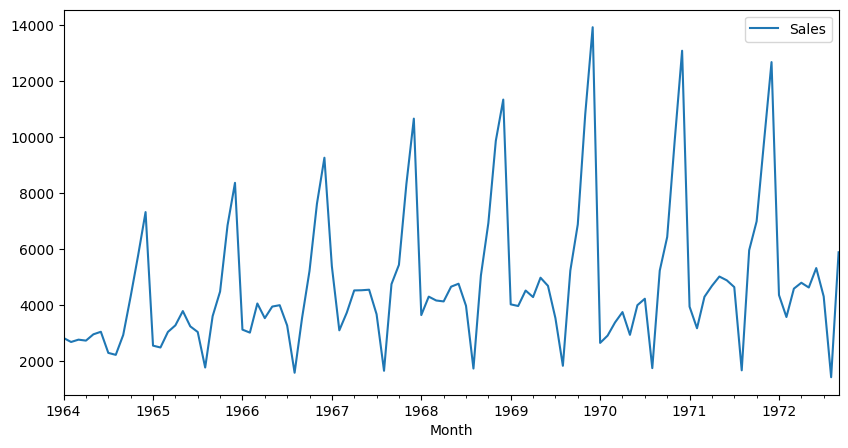

In [ ]:
data.plot(figsize=(10,5))

In [ ]:
scalar=MinMaxScaler()
traindata=data[:53]
testdata=data[52:]

In [ ]:
scaledtraindata=scalar.fit_transform(traindata)
scaledtestdata=scalar.fit_transform(testdata)

In [ ]:
n_input=12
n_features=1
generator=TimeseriesGenerator(scaledtraindata,scaledtraindata,length=12,batch_size=1)

In [ ]:
x,y=generator[0]
print(x.flatten(),y)

[0.13681428 0.12106191 0.13020489 0.12645957 0.15124477 0.16115885
 0.0781009  0.07038995 0.14860101 0.30050672 0.46166557 0.63218771] [[0.10663142]]


In [ ]:
x,y=generator[1]
print(x.flatten(),y)

[0.12106191 0.13020489 0.12645957 0.15124477 0.16115885 0.0781009
 0.07038995 0.14860101 0.30050672 0.46166557 0.63218771 0.10663142] [[0.09936109]]


In [ ]:
x,y=generator[2]
print(x.flatten(),y)

[0.13020489 0.12645957 0.15124477 0.16115885 0.0781009  0.07038995
 0.14860101 0.30050672 0.46166557 0.63218771 0.10663142 0.09936109] [[0.16060806]]


In [ ]:
model=Sequential()
model.add(SimpleRNN(100,activation='relu',input_shape=(12,1)))
model.add(Dense(1,activation='tanh'))

In [ ]:
model.compile(optimizer='adam',loss='mse')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 10301 (40.24 KB)
Trainable params: 10301 (40.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
Trained_history=model.fit(generator,epochs=20)

Epoch 1/20
41/41 [==============================] - 2s 6ms/step - loss: 0.0503
Epoch 2/20
41/41 [==============================] - 0s 6ms/step - loss: 0.0343
Epoch 3/20
41/41 [==============================] - 0s 5ms/step - loss: 0.0259
Epoch 4/20
41/41 [==============================] - 0s 4ms/step - loss: 0.0154
Epoch 5/20
41/41 [==============================] - 0s 4ms/step - loss: 0.0159
Epoch 6/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0121
Epoch 7/20
41/41 [==============================] - 0s 4ms/step - loss: 0.0108
Epoch 8/20
41/41 [==============================] - 0s 4ms/step - loss: 0.0056
Epoch 9/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 10/20
41/41 [==============================] - 0s 4ms/step - loss: 0.0039
Epoch 11/20
41/41 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 12/20
41/41 [==============================] - 0s 4ms/step - loss: 0.0029
Epoch 13/20
41/41 [==============================

In [ ]:
hist=Trained_history.history
hist.keys()

dict_keys(['loss'])

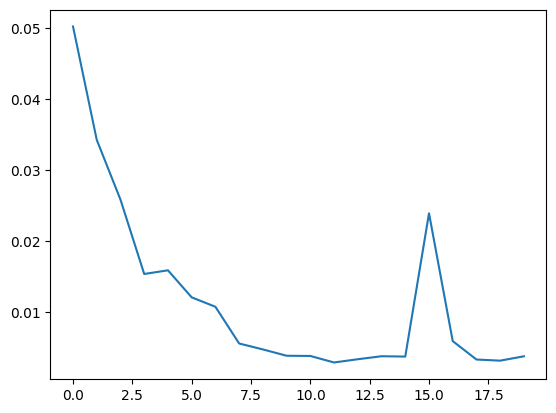

In [ ]:
loss=model.history.history['loss']
plt.plot(range(len(loss)),loss)

In [ ]:
test_prediction=[]
first_batch=scaledtraindata[-n_input:]
current_batch=first_batch.reshape(1,12,1)
for i in range(len(testdata)):
  current_pred=model.predict(current_batch)[0]
  print(current_pred)
  test_prediction.append(current_pred)
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


1/1 [==============================] - 0s 20ms/step
[0.3341921]
1/1 [==============================] - 0s 19ms/step
[0.30003393]
1/1 [==============================] - 0s 22ms/step
[0.06350426]
1/1 [==============================] - 0s 24ms/step
[0.29655096]
1/1 [==============================] - 0s 22ms/step
[0.42490926]
1/1 [==============================] - 0s 22ms/step
[0.73059744]
1/1 [==============================] - 0s 23ms/step
[0.9104437]
1/1 [==============================] - 0s 20ms/step
[0.4030052]
1/1 [==============================] - 0s 21ms/step
[0.1751819]
1/1 [==============================] - 0s 22ms/step
[0.23607405]
1/1 [==============================] - 0s 22ms/step
[0.25579813]
1/1 [==============================] - 0s 20ms/step
[0.27195472]
1/1 [==============================] - 0s 24ms/step
[0.3543149]
1/1 [==============================] - 0s 20ms/step
[0.32325205]
1/1 [==============================] - 0s 21ms/step
[0.07363454]
1/1 [=========================

In [ ]:
print(test_prediction)

[array([0.3341921], dtype=float32), array([0.30003393], dtype=float32), array([0.06350426], dtype=float32), array([0.29655096], dtype=float32), array([0.42490926], dtype=float32), array([0.73059744], dtype=float32), array([0.9104437], dtype=float32), array([0.4030052], dtype=float32), array([0.1751819], dtype=float32), array([0.23607405], dtype=float32), array([0.25579813], dtype=float32), array([0.27195472], dtype=float32), array([0.3543149], dtype=float32), array([0.32325205], dtype=float32), array([0.07363454], dtype=float32), array([0.26966816], dtype=float32), array([0.3927366], dtype=float32), array([0.68888396], dtype=float32), array([0.88402873], dtype=float32), array([0.44932684], dtype=float32), array([0.16594955], dtype=float32), array([0.20573248], dtype=float32), array([0.24767461], dtype=float32), array([0.2570988], dtype=float32), array([0.36550322], dtype=float32), array([0.33375174], dtype=float32), array([0.09260248], dtype=float32), array([0.24014322], dtype=float32)

In [ ]:
true_pred=scalar.inverse_transform(test_prediction)
print(true_pred)

[[ 5591.40379113]
 [ 5164.32418883]
 [ 2206.99371662]
 [ 5120.77664474]
 [ 6725.64052591]
 [10547.65974766]
 [12796.27787119]
 [ 6451.77417246]
 [ 3603.29923937]
 [ 4364.63378839]
 [ 4611.24403474]
 [ 4813.24980479]
 [ 5842.99911323]
 [ 5454.62040702]
 [ 2333.65259203]
 [ 4784.66102785]
 [ 6323.38588172]
 [10026.11615497]
 [12466.01124591]
 [ 7030.93351832]
 [ 3487.8672643 ]
 [ 3985.27319358]
 [ 4509.67570123]
 [ 4627.50622118]
 [ 5982.88678154]
 [ 5585.89798111]
 [ 2570.8087634 ]
 [ 4415.51073714]
 [ 6031.58279458]
 [ 9467.75562501]
 [12208.77932471]
 [ 8095.92507851]
 [ 3500.35780692]
 [ 3635.36063384]
 [ 4545.76267898]
 [ 4624.56737956]
 [ 6009.16383371]
 [ 5710.59585884]
 [ 2939.35876581]
 [ 3982.16071178]
 [ 5826.44442132]
 [ 8831.4075467 ]
 [11912.80104798]
 [ 9969.12043887]
 [ 3849.22722135]
 [ 3498.76150954]
 [ 4672.47791293]
 [ 4751.22485766]
 [ 5872.4270269 ]
 [ 5750.19737369]
 [ 3865.49313398]
 [ 3052.74413411]
 [ 5684.75067145]]


In [ ]:
test_data_inverse=scalar.inverse_transform(scaledtestdata)
print(test_data_inverse)

[[ 4647.]
 [ 4753.]
 [ 3965.]
 [ 1723.]
 [ 5048.]
 [ 6922.]
 [ 9858.]
 [11331.]
 [ 4016.]
 [ 3957.]
 [ 4510.]
 [ 4276.]
 [ 4968.]
 [ 4677.]
 [ 3523.]
 [ 1821.]
 [ 5222.]
 [ 6872.]
 [10803.]
 [13916.]
 [ 2639.]
 [ 2899.]
 [ 3370.]
 [ 3740.]
 [ 2927.]
 [ 3986.]
 [ 4217.]
 [ 1738.]
 [ 5221.]
 [ 6424.]
 [ 9842.]
 [13076.]
 [ 3934.]
 [ 3162.]
 [ 4286.]
 [ 4676.]
 [ 5010.]
 [ 4874.]
 [ 4633.]
 [ 1659.]
 [ 5951.]
 [ 6981.]
 [ 9851.]
 [12670.]
 [ 4348.]
 [ 3564.]
 [ 4577.]
 [ 4788.]
 [ 4618.]
 [ 5312.]
 [ 4298.]
 [ 1413.]
 [ 5877.]]


In [ ]:
df=pd.DataFrame({'truevalue':test_data_inverse[:,0],'predictedvalue':true_pred[:,0]})
print(df)

    truevalue  predictedvalue
0      4647.0     5591.403791
1      4753.0     5164.324189
2      3965.0     2206.993717
3      1723.0     5120.776645
4      5048.0     6725.640526
5      6922.0    10547.659748
6      9858.0    12796.277871
7     11331.0     6451.774172
8      4016.0     3603.299239
9      3957.0     4364.633788
10     4510.0     4611.244035
11     4276.0     4813.249805
12     4968.0     5842.999113
13     4677.0     5454.620407
14     3523.0     2333.652592
15     1821.0     4784.661028
16     5222.0     6323.385882
17     6872.0    10026.116155
18    10803.0    12466.011246
19    13916.0     7030.933518
20     2639.0     3487.867264
21     2899.0     3985.273194
22     3370.0     4509.675701
23     3740.0     4627.506221
24     2927.0     5982.886782
25     3986.0     5585.897981
26     4217.0     2570.808763
27     1738.0     4415.510737
28     5221.0     6031.582795
29     6424.0     9467.755625
30     9842.0    12208.779325
31    13076.0     8095.925079
32     393

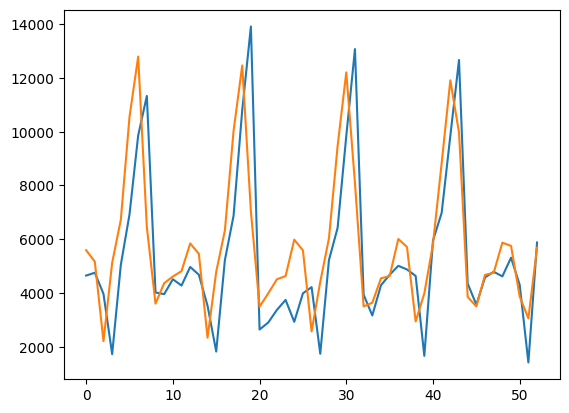

In [ ]:
plt.plot(df['truevalue'])
plt.plot(df['predictedvalue'])